In [4]:
!pip install tensorflow
import tensorflow as tf
import keras

from keras.datasets import cifar10
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.optimizers import SGD,Adam,RMSprop
import matplotlib.pyplot as plt

#CIFAR_10 IS A SET OF 60K IMAGES 32*32 PIXELS ON 3 CHANNELS
IMG_CHANNELS=3
IMG_ROWS=32
IMG_COLS=32

#CONSTANT
BATCH_SIZE=128
NB_EPOCH=20
NB_CLASSES=10
VERBOSE=1
VALIDATION_SPLIT=0.2
OPTIM=RMSprop()

#load dataset
(X_train,Y_train),(X_test,y_test)=cifar10.load_data()
print('X_train shape:',X_train.shape)
print(X_train.shape[0],'train  samples')
print(X_test.shape[0],'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train  samples
10000 test samples


In [0]:
#convert to categorical
Y_train = np_utils.to_categorical(Y_train,NB_CLASSES)
Y_test = np_utils.to_categorical(y_test,NB_CLASSES)

#float and normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [6]:
#network
model = Sequential()
model.add(Conv2D(32 , (3, 3), padding='same',
input_shape=(IMG_ROWS, IMG_COLS, IMG_CHANNELS)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)              

In [8]:
#train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, 
metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=BATCH_SIZE, 
epochs=NB_EPOCH, validation_split=VALIDATION_SPLIT, 
verbose=VERBOSE)
score=model.evaluate(X_test, Y_test,
batch_size=BATCH_SIZE,verbose=VERBOSE)
print("test score:",score[0])
print('test accuracy:',score[1])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/20





40000/40000 [==============================] - 65s 2ms/step - loss: 1.7340 - acc: 0.3871 - val_loss: 1.4237 - val_acc: 0.4879
Epoch 2/20
40000/40000 [==============================] - 64s 2ms/step - loss: 1.3708 - acc: 0.5131 - val_loss: 1.2865 - val_acc: 0.5551
Epoch 3/20
40000/40000 [==============================] - 64s 2ms/step - loss: 1.2437 - acc: 0.5625 - val_loss: 1.2275 - val_acc: 0.5726
Epoch 4/20
40000/40000 [==============================] - 64s 2ms/step - loss: 1.1529 - acc: 0.5920 - val_loss: 1.0917 - val_acc: 0.6224
Epoch 5/20
40000/40000 [==============================] - 64s 2ms/step - loss: 1.0798 - acc: 0.6238 - val_loss: 1.1300 - val_acc: 0.6075
Epoch 6/20
40000/40000 [==============================] - 64s 2ms/step - loss: 1.0239 - acc: 0.6420 - val_loss: 1.0826 - val_acc: 0.6291
Epoch 7/20
40000/40000 [

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_2 (Activation)    (None, 512)              

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [12]:
from google.colab import files
uploaded = files.upload()
my_image = img.imread("horse.jpg")

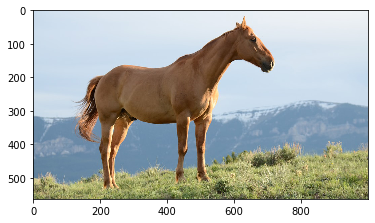

In [13]:
img = plt.imshow(my_image)

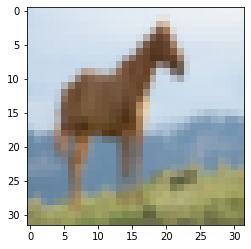

In [14]:
from skimage.transform import resize
my_image_resized = resize(my_image,(32,32,3))
img = plt.imshow(my_image_resized)

In [0]:
import numpy as np
probabilities = model.predict( np.array( [my_image_resized] ) )

In [16]:
probabilities

array([[1.4562694e-02, 4.9901346e-06, 9.2472672e-02, 9.0766363e-02,
        1.2234255e-01, 8.4392717e-03, 5.9600312e-05, 6.6823518e-01,
        1.9259043e-03, 1.1908092e-03]], dtype=float32)

In [17]:
number_to_class =['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
index = np.argsort(probabilities[0,:])
print('most likely class:',number_to_class[index[4]], '--probability:', probabilities[0, index[4]])
print('second most likely class:',number_to_class[index[8]], '--probability:', probabilities[0, index[8]])
print('third most likely class:',number_to_class[index[7]], '--probability:', probabilities[0, index[7]])
print('fourth most likely class:',number_to_class[index[6]], '--probability:', probabilities[0, index[6]])
print('fifth most likely class:',number_to_class[index[9]], '--probability:', probabilities[0, index[9]])

most likely class: dog --probability: 0.008439272
second most likely class: deer --probability: 0.12234255
third most likely class: bird --probability: 0.09247267
fourth most likely class: cat --probability: 0.09076636
fifth most likely class: horse --probability: 0.6682352
